# **Project Name**    -
**AIRBNB PROJECT**

##### **Project Type**    - EDA (AIRBNB)
##### **Contribution**    - Individual
##### **Team Member -** **PARTH KHERA**


# **Project Summary -**

Airbnb is a global online marketplace connecting property owners with travelers seeking short-term accommodations, offering unique experiences beyond traditional lodging. It generates revenue through service fees charged to both guests and hosts, facilitating secure transactions. This project undertakes a comprehensive Exploratory Data Analysis (EDA) of the Airbnb listings in New York City for 2019. Its core objective is to extract valuable, data-driven insights to support strategic decision-making for hosts, guests, and the Airbnb platform itself, by analyzing trends in pricing, availability, location-based demand, and customer engagement.
The project followed a structured approach, encompassing four key phases:
1. Data Cleaning and Preprocessing: This foundational phase transformed the raw dataset into an analysis-ready format. Initial inspection revealed missing values in name, host_name, last_review, and reviews_per_month. name and host_name were imputed with 'Unknown', while reviews_per_month was filled with 0. last_review was converted to datetime. A critical step involved removing all listings with a price of 0 as they were unrealistic. To manage extreme outliers, a percentile-based capping strategy was applied to numerical columns like price, minimum_nights, number_of_reviews, reviews_per_month, and calculated_host_listings_count at their 99th percentile. This ensured statistical summaries and visualizations accurately represented the majority of listings. Finally, days_since_last_review was engineered to quantify listing recency, providing a direct metric for activity.
2. Exploratory Data Analysis (EDA): This phase involved extensive visualization and statistical analysis to uncover patterns. Key insights from univariate, bivariate, and multivariate charts include:
•	Listing Concentration: Brooklyn and Manhattan are the primary Airbnb hubs, showing the highest density of listings, which implies both opportunities for resource allocation and intense price competition.
•	Price Distribution and Trends: The price distribution is heavily right-skewed, with most listings priced between $50 and $200. Very few luxury listings ($600+) exist, indicating a potential niche market gap.
•	Price vs. Reviews: An inverse relationship was identified: lower-priced listings with shorter minimum stays consistently garnered more reviews, signifying higher guest engagement. Higher-priced listings generally had fewer reviews.
•	Room Type Preferences: 'Private room' and 'Entire home/apt' dominated the market. Guests often preferred 'Private rooms' for affordability and privacy, while 'Shared rooms' were significantly underutilized despite high availability.
•	Minimum Night Impact: Higher minimum night requirements correlated with fewer reviews, suggesting they can limit booking frequency, especially during off-peak seasons.
•	Availability Patterns: Listings concentrated at both very low (0 days) and very high (365 days) availability. Manhattan and Brooklyn showed lower availability (higher demand), while Bronx and Staten Island had higher availability.
•	Host Landscape: The presence of professional hosts managing large portfolios highlighted a significant commercial segment.
3. Business Insights: The EDA insights directly translate into actionable recommendations:
•	For Hosts: Optimize pricing based on borough and room type, prioritize recent reviews, and strategically manage minimum stay requirements and availability to maximize occupancy and revenue.
•	For Guests: Utilize analysis to efficiently identify budget-friendly options (Queens/Bronx, Private/Shared rooms) or premium experiences (Manhattan, Entire home/apt). Filter by review count and recency for popular stays.
•	For Airbnb: Implement targeted marketing campaigns, focus host recruitment in underserved boroughs, and develop advanced tools for dynamic pricing and review generation.
4. Impact and Application: This project's comprehensive analysis, underpinned by robust data wrangling, provides a data-driven blueprint for navigating the competitive NYC Airbnb market. The insights empower hosts to enhance their listing performance, enable guests to find ideal accommodations, and equip Airbnb with strategic intelligence for growth and operational challenges. Ultimately, these applications contribute to enhancing guest experience, increasing occupancy, and driving sustainable business growth within the dynamic short-term rental industry.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The Airbnb NYC 2019 market is complex. This EDA project aims to uncover key data patterns influencing listing prices, availability, and user preferences. The goal is to provide actionable insights for hosts to optimize revenue, guests to find ideal stays, and Airbnb to identify market trends and growth opportunities efficiently.

#### **Define Your Business Objective?**

1. Help new and existing Airbnb hosts optimize their pricing strategies and listing features for better occupancy and revenue.
2. Assist potential guests in finding suitable accommodations based on their budget, desired location, and room type.


<!-- Answer Here. -->

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [298]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [300]:
# Load Dataset
path = '/content/drive/MyDrive/Colab Notebooks/data set/Copy of Airbnb NYC 2019 - Copy of Airbnb NYC 2019.csv'

In [301]:
data = pd.read_csv(path)

[link text](https:// [link text](https://))### Dataset First View

In [302]:
# Dataset First Look
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [303]:
# Dataset Rows & Columns count
data.shape

(48895, 16)

### Dataset Information

In [304]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [305]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [306]:
# Missing Values/Null Values Count
print(data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

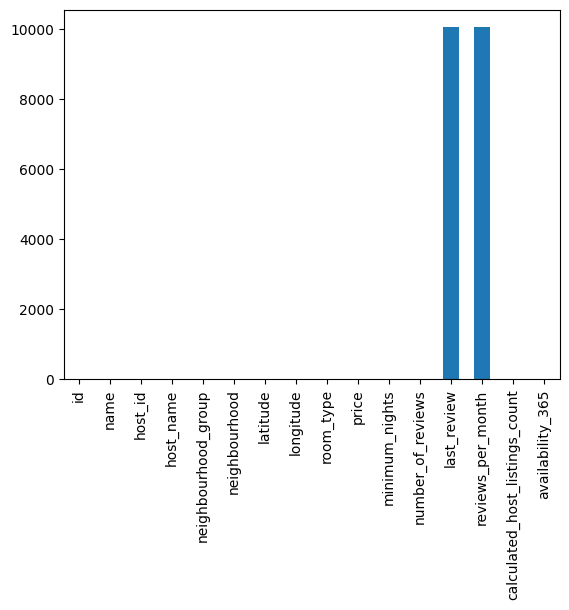

In [307]:
# Visualizing the missing values
data.isnull().sum().plot(kind = 'bar')

### What did you know about your dataset?

---



The dataset contains information about Airbnb listings in NYC in 2019.

This dataset has 48895 rows and 16 columns

The dataset contains information about Airbnb listings in New York City from 2019.

It includes a mix of numerical and categorical variables.

There were significant missing values in columns such as name, host_name, last_review, and reviews_per_month. These missing values suggested either incomplete listing information or the absence of review activity for those listings.

The price and minimum_nights columns contained extreme outliers, including very high values (indicating luxury listings or unusually long stay requirements) and unrealistic zero-dollar entries for price.

No duplicate rows were identified, ensuring the uniqueness of the data records.

## ***2. Understanding Your Variables***

In [308]:
# Dataset Columns
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [309]:
# Dataset Describe
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [310]:
# Missing values
data.isnull().values.any()
data.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


### Variables Description

**VARIABLES DESCRIPTION**

- id: Unique ID for each listing
- name: Name of the listing
- host_id: Unique ID of the host
- host_name: Name of the host
- neighbourhood_group: This contains the name of the neighbourhood group of that region
- neighbourhood: This contains the name if the neighbourhood
- latitude: Latitude coordinate of the property
- longitude: Longitude coordinate of the property
- room_type: Type of room  
- price: Price per night
- minimum_nights: Minimum number of nights required for a booking
- number_of_reviews: Total number of reviews for the listing
- last_review: Date of the last review
- reviews_per_month: Number of reviews per month
- calculated_host_listings_count: Total number of listings the host has
- availability_365: Number of days the property is available in a year


### Check Unique Values for each variable.

In [311]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("Unique value in",i,"are:",data[i].nunique())

Unique value in id are: 48895
Unique value in name are: 47892
Unique value in host_id are: 37457
Unique value in host_name are: 11452
Unique value in neighbourhood_group are: 5
Unique value in neighbourhood are: 221
Unique value in latitude are: 19048
Unique value in longitude are: 14718
Unique value in room_type are: 3
Unique value in price are: 674
Unique value in minimum_nights are: 109
Unique value in number_of_reviews are: 394
Unique value in last_review are: 1764
Unique value in reviews_per_month are: 937
Unique value in calculated_host_listings_count are: 47
Unique value in availability_365 are: 366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [312]:
# Write your code to make your dataset analysis ready.
# Filling the NA where the value is unkown
df = data.copy()
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

/tmp/ipython-input-312-2652129831.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
/tmp/ipython-input-312-2652129831.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [313]:
# Filled `reviews_per_month` missing values with `0
df['reviews_per_month'].fillna(0,inplace = True)

# Fill missing last_review with a placeholder 'no review'
df['last_review'].fillna('No review', inplace=True)
df.isnull().sum()
df.dropna(subset = ['name','host_name'],inplace = True)
df.isnull().sum()

/tmp/ipython-input-313-3580650930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0,inplace = True)
/tmp/ipython-input-313-3580650930.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [314]:
# Changing the data type of last review to datetime from object
df['last_review'] = pd.to_datetime(data['last_review'])
df.head()
df.isnull().sum()
df = df[df['last_review'].notnull()]
df.dtypes


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [315]:
# Ensuring that the price of the room is greater than zero, if it is zero then it doesn't mean anything
df = df[data['price'] > 0]
ids = df.loc[df['price'] > 0, 'id']
# Print id of all the roo
print(ids)

/tmp/ipython-input-315-350399935.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[data['price'] > 0]


0            2539
1            2595
3            3831
4            5022
5            5099
           ...   
48782    36425863
48790    36427429
48799    36438336
48805    36442252
48852    36455809
Name: id, Length: 38833, dtype: int64


In [316]:
# To check availability is zero or not
df[df['availability_365']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46532,35292625,Room-cabin in Hell's kitchen,137191484,Maria,Manhattan,Hell's Kitchen,40.76479,-73.98667,Private room,86,1,1,2019-06-05,0.88,5,0
46583,35329913,Charming Brooklyn Garden apt - historic Macdon...,46724430,Mariana,Brooklyn,Bedford-Stuyvesant,40.68364,-73.92307,Entire home/apt,125,3,1,2019-07-01,1.00,1,0
47175,35615687,Duplex Apartment 3 bedroom 2 bath (6 guest),145082728,Jason & Kelly,Brooklyn,Bedford-Stuyvesant,40.68091,-73.95006,Entire home/apt,350,2,1,2019-06-30,1.00,2,0
47218,35642891,Beautiful room in Bushwick,268138154,Julio,Brooklyn,Bushwick,40.69640,-73.91898,Private room,10,1,2,2019-06-18,2.00,1,0


In [317]:
df['minimum_nights'].value_counts()

,count
minimum_nights,
2,10299
1,9886
3,6842
4,2752
5,2424
...,...
37,1
105,1
222,1


In [318]:
df['price'].describe()
df['minimum_nights'].describe()
df['availability_365'].describe()

,availability_365
count,38833.000000
mean,114.878222
std,129.549091
min,0.000000
25%,0.000000
50%,55.000000
75%,229.000000
max,365.000000


In [319]:
# Printing the data type of all the column
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [320]:
# Count total number of listing
listing_counts = df['neighbourhood_group'].value_counts()
print(listing_counts)


neighbourhood_group
Manhattan        16632
Brooklyn         16438
Queens            4574
Bronx              875
Staten Island      314
Name: count, dtype: int64


In [321]:
# Printing the mean price of the Airbnb room
means = print(f"The mean is : {df['price'].mean()}")

The mean is : 142.35459531841474


In [322]:
# Printing the median price of the Airbnb room
print(f"The median is : {df['price'].median()}")

The median is : 101.0


In [323]:
# Printing the mode price of the Airbnb room
print(f"The mode is : {df['price'].mode()}")

The mode is : 0    150
Name: price, dtype: int64


In [324]:
# Printing the max price of the Airbnb room
print(f"The max price is : {df['price'].max()}")

The max price is : 10000


In [325]:
# Printing the min price of the Airbnb room
print(f"The min price is : {df['price'].min()}")

The min price is : 10


In [326]:
df[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
3,40.68514,-73.95976
4,40.79851,-73.94399
5,40.74767,-73.97500
...,...,...
48782,40.78099,-73.95366
48790,40.75104,-73.81459
48799,40.54179,-74.14275
48805,40.80787,-73.92400


In [327]:
# Calculqting the the type of room and their count to make convenience for customer
room_types = df['room_type'].value_counts()
room_types

,count
room_type,
Entire home/apt,20331
Private room,17658
Shared room,844


In [328]:
df[df['name']=='Private Room'][['host_name','id','host_id']]

,host_name,id,host_id
3068,Brian,1811446,9490594
18462,Rory,14532445,89855730
30651,Claudio,23713825,145252418
31775,Frances,24779271,65119217
33589,Syeda,26574893,199833548
33717,George,26721080,44630233
34087,Cansu,27014758,34883773
34170,Yvonne,27098774,62533391
35732,Tae,28358666,31770868
42273,Kathleen,32813805,246849103


In [329]:
no_of_house = df.groupby('room_type')['host_name'].unique()
h1 = no_of_house['Private room'].size
h2 = no_of_house['Shared room'].size
h3 = no_of_house['Entire home/apt'].size
print(f"The number of private room are: {h1}")
print(f"The number of shared room are: {h2}")
print(f"The number of entire home/apt are: {h3}")

The number of private room are: 5554
The number of shared room are: 470
The number of entire home/apt are: 6469


In [330]:
df['total_revenue'] = df['price']*df['availability_365']
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,79875
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,25800


In [331]:
# Calculate the total bill for minimum night stay
df['total_bill per_stay_at_minimum_night'] = df['price']*df['minimum_nights']
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_revenue,total_bill per_stay_at_minimum_night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,79875,225
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,800
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,25800,600


In [332]:
# Creating a column 'review rate'
df['review_rate'] = df['reviews_per_month']/df['number_of_reviews']
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_revenue,total_bill per_stay_at_minimum_night,review_rate
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385,149,0.023333
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,79875,225,0.008444
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266,89,0.017185
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,800,0.011111
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,25800,600,0.007973


In [333]:
# Sorting the prices to increase the efficiency to choose the accomodation for a client
sort_prices = df.sort_values(by=['price'])
sort_prices

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_revenue,total_bill per_stay_at_minimum_night,review_rate
27972,21869057,Spacious 2-bedroom Apt in Heart of Greenpoint,11967922,Vishanti & Jeremy,Brooklyn,Greenpoint,40.72421,-73.95364,Entire home/apt,10,1,93,2019-07-01,4.73,1,32,320,10,0.050860
23256,18835820,"Quiet, Cozy UES Studio Near the Subway",52777892,Amy,Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10,3,10,2018-10-22,0.39,1,0,0,30,0.039000
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,2019-06-12,1.68,1,252,2520,10,0.039070
31407,24412104,Cozy feel at home studio,91034542,Maureen,Manhattan,Kips Bay,40.74408,-73.97803,Private room,10,5,42,2019-06-30,2.87,1,2,20,50,0.068333
31066,24114389,"Very Spacious bedroom, steps from CENTRAL PARK.",180661875,Salim,Manhattan,Upper West Side,40.76844,-73.98333,Private room,10,1,2,2018-04-23,0.13,1,0,0,10,0.065000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251,2133500,255000,0.090000
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0,0,49995,0.020000
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,829917,989901,0.023333
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,0,1000000,0.020000


In [334]:
# Allocating the price range
price_bins = [0, 100, 250, df['price'].max()]
price_labels = ['Low (0-100)', 'Medium (101-250)', 'High (251+)']

df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_revenue,total_bill per_stay_at_minimum_night,review_rate,price_range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385,149,0.023333,Medium (101-250)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,79875,225,0.008444,Medium (101-250)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266,89,0.017185,Low (0-100)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,800,0.011111,Low (0-100)
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,25800,600,0.007973,Medium (101-250)


### What all manipulations have you done and insights you found?

Data Manipulations include:
1. Replacing the unknown value in the name and host name with the NA.
2. Replacing the 0 with the NA in reviews_per_month and filling 'NA' in place of No review.
3. Dropping the name and host name having the null value.
4. COnverting the last_review data type from object to datetime.
5. Checking the columns where the price is 0 as an outlier.
6. Checking the columns having availability equal to 0, which gives us a large data having 0 availabale days which are: 17530 rows.
7. Calculating the count for every minimum_nigts mentioned in the data.
8. Describing the price, availability_365, minimum_nights.
9. Counting the number of listing for each type of listing.
10. Calculation the mean, median, mode, max and min price.
11. Defining the latitude, longitude columns
12. Defining the data according to sort by the price.
13. Create column review rate, total_revenue, total_bill_per_stay_at_minimum_night, and price range.
14. Calculating the available room type in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-335-2291793308.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_availability = df.groupby('price_range')['availability_365'].mean().reset_index()
/tmp/ipython-input-335-2291793308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_availability, x='price_range', y='availability_365', palette='viridis')


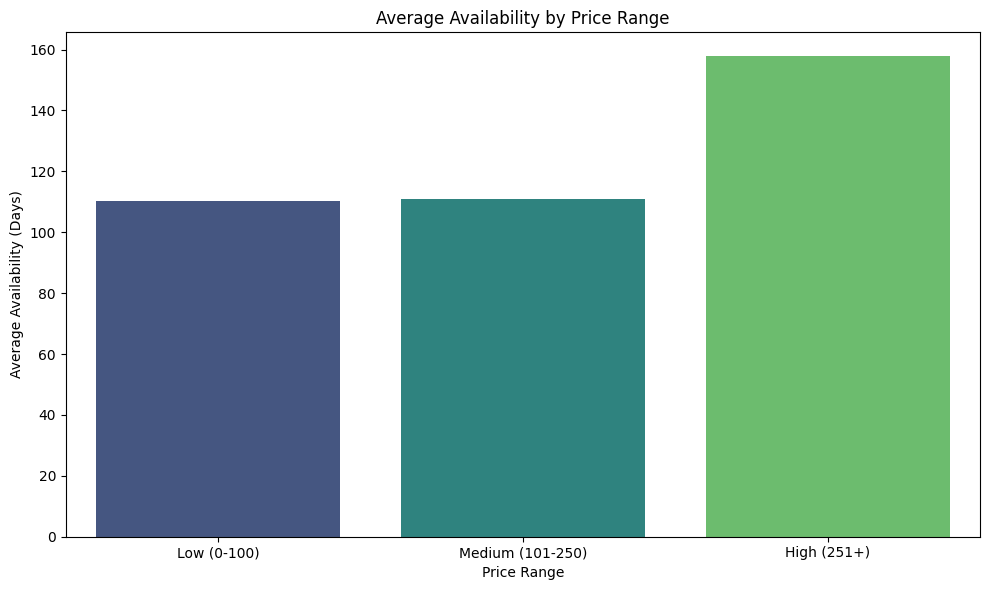

In [335]:
# Assuming price_range column already exists from previous code

avg_availability = df.groupby('price_range')['availability_365'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_availability, x='price_range', y='availability_365', palette='viridis')
plt.title('Average Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Availability (Days)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?








I chose a bar plot because it clearly shows the average availability of listings grouped by different price ranges. Bar plots are excellent for comparing averages across categories.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can identify that the price increase if the availability is more than 160 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Understanding the relationship between price and availability helps hosts optimize their pricing strategy to improve booking potential.

Negative Impact:
Hosts need to balance price and availability to avoid underutilization of their listings.

#### Chart - 2

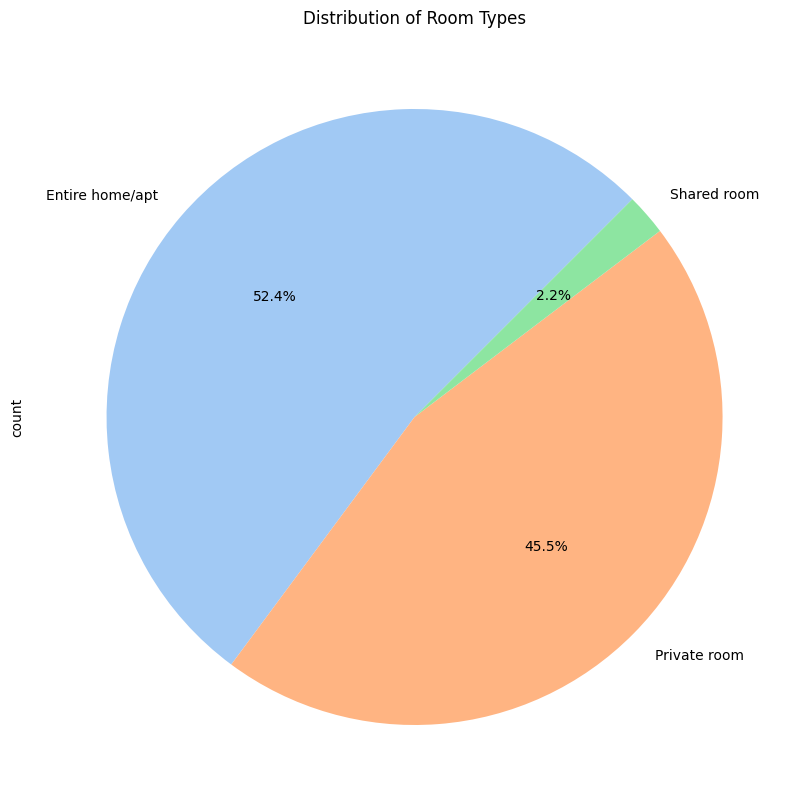

In [336]:
# Chart - 2 visualization code
# distribution of room type
plt.figure(figsize=(10,10))
df['room_type'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=45, colors=sns.color_palette('pastel'))
plt.title('Distribution of Room Types')
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is suitable for showing the distribution of a categories in a single categorical variable showing percentage.


##### 2. What is/are the insight(s) found from the chart?

1. Chart tells us about how much share each room type hold on Airbnb.
2. In this chart we can see entire home/apt and private room hold a major share.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
1. Adjust pricing
2. Target marketing
3. Improve experience of user
4. To increase the availability of a particular room type.


Negative Impact:
1. Dependency on specific room type which decline the growth of a shared room type.
2. Users will be less, because mostly people wants shared room type which manage their budgets.

#### Chart - 3

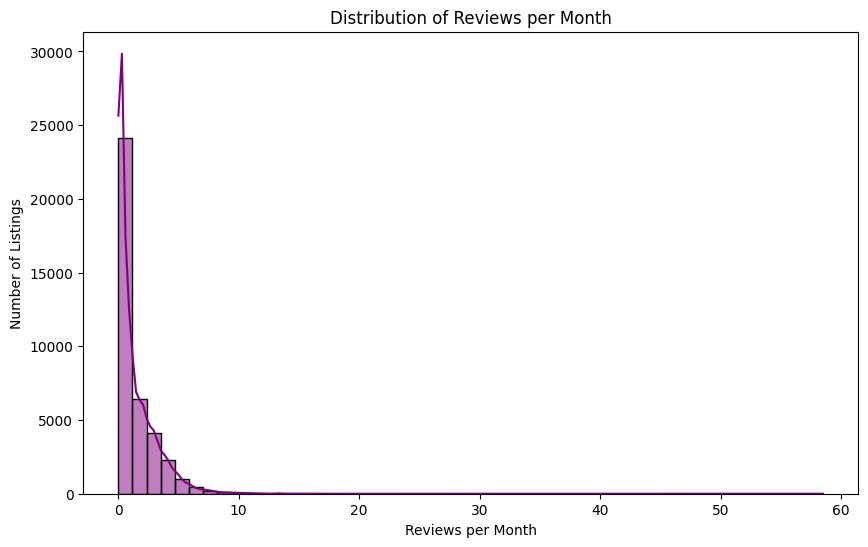

In [337]:
# Graph visualisation - 3
plt.figure(figsize=(10,6))
sns.histplot(df['reviews_per_month'].dropna(), bins=50, color='purple', kde=True)
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Number of Listings')
plt.show()



##### 1. Why did you pick the specific chart?

I chose a histogram with KDE because it effectively shows the distribution of reviews per month across all listings. It helps visualize how common different review frequencies are, highlighting trends, peaks, and spread in the data.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that most listings have low reviews per month, with a sharp peak near zero, indicating many listings receive few or no reviews monthly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Understanding that many listings get few reviews can guide businesses or hosts to improve marketing or service quality to increase bookings and reviews.

Potential Negative Insight:
The high number of listings with very low reviews might indicate oversupply or quality issues, leading to poor guest experience or lower overall platform ratings if not addressed.


#### Chart - 4

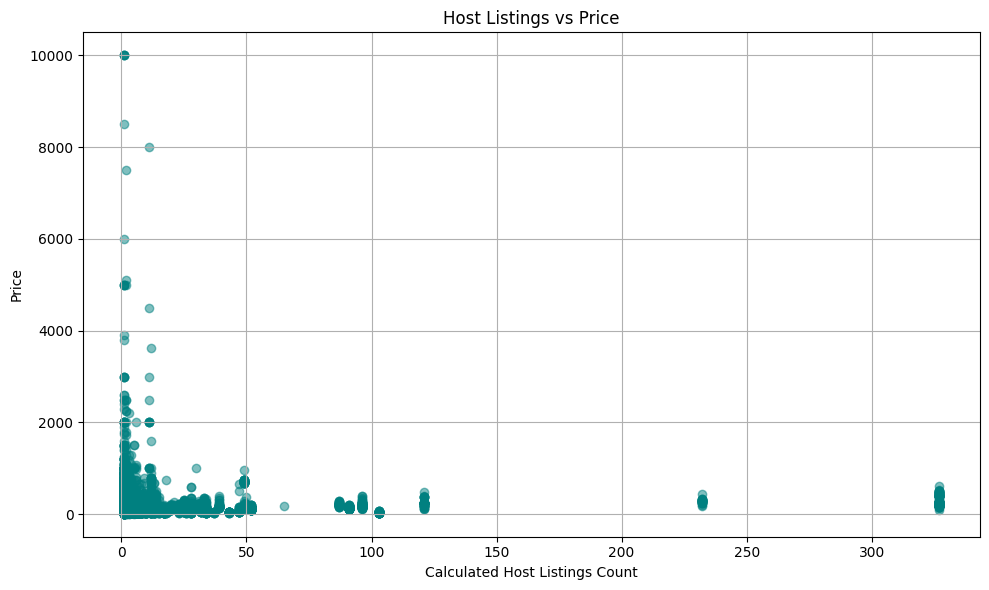

In [338]:
# Chart - 4 visualization code
# Host listing vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['calculated_host_listings_count'], df['price'], alpha=0.5, color='teal')
plt.title('Host Listings vs Price')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is perfect for showing the relationship between two continuous variables. In this case we have two continuous variables which are calculated_host_listings_count and price.

##### 2. What is/are the insight(s) found from the chart?

1. There are many host with less listing count have the high property price for them, but whereas there are some host with more listing count also standout.
2. There is no clear trend which suggest that price is continuously affecting the host lisiting count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Airbnb can distinguish between professional and beginner host for better accomodations.

Negative impact: Professional host dominance and Pricing inconsistencies.

#### Chart - 5

/tmp/ipython-input-339-3070480293.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='price', data=top_props, palette='bright')


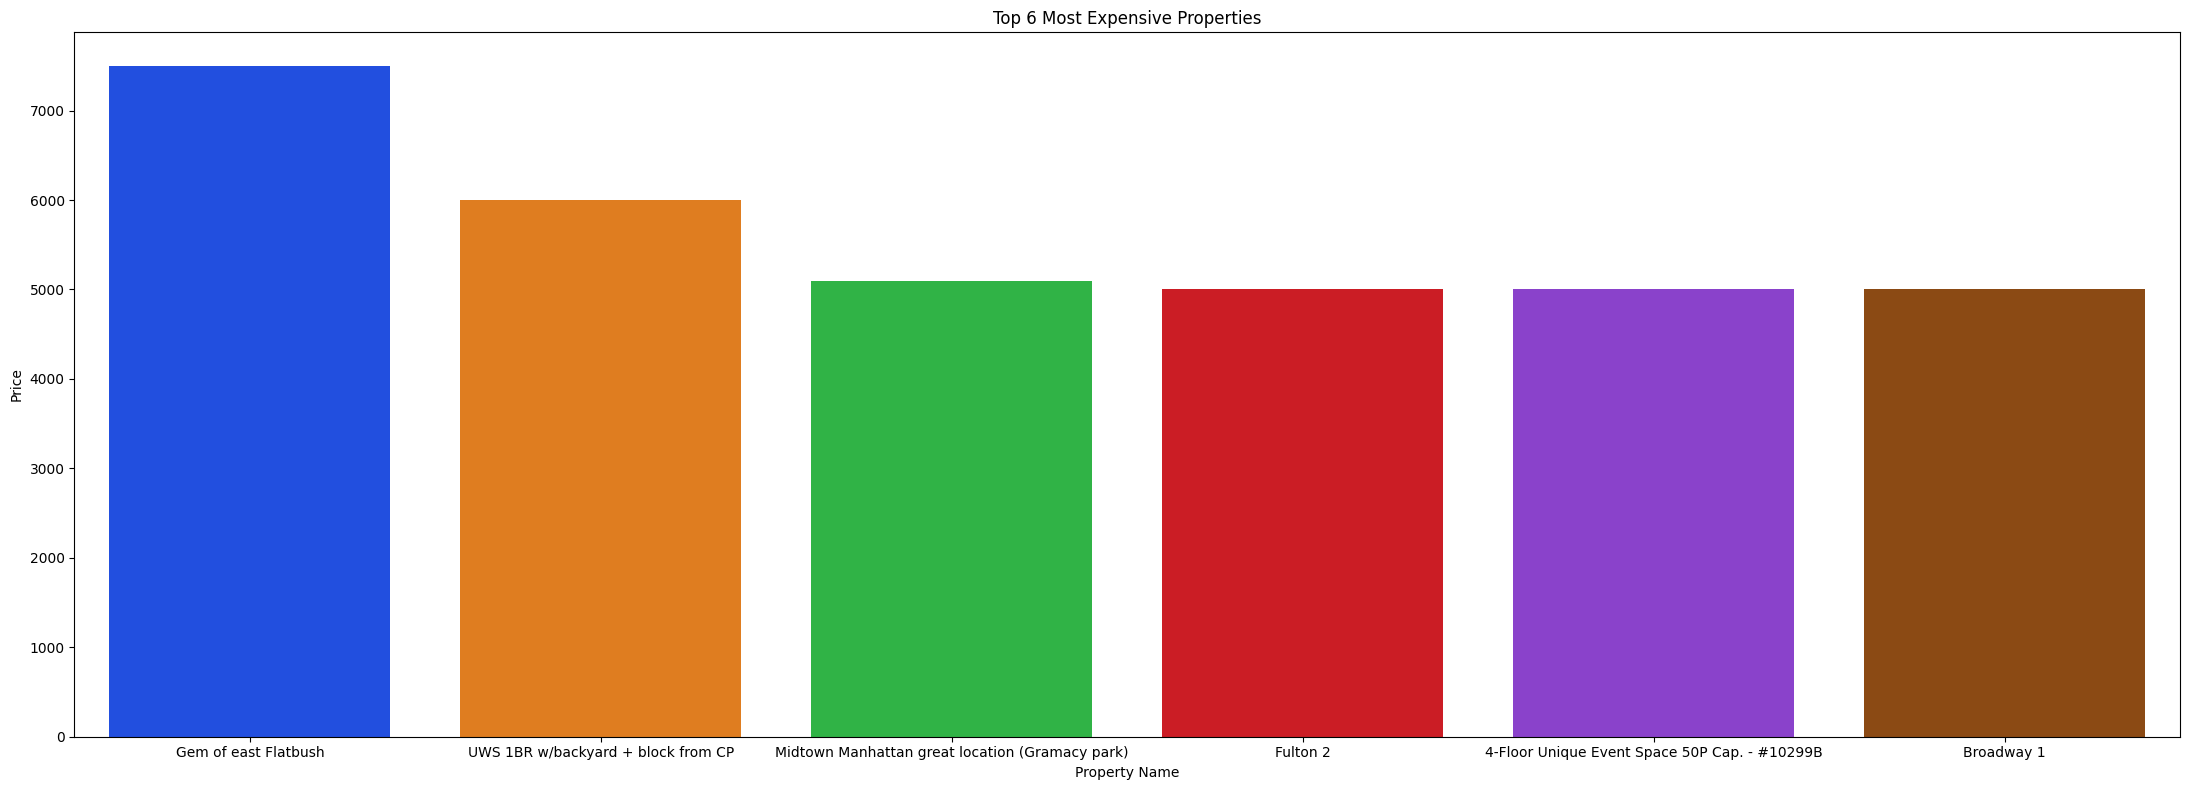

In [339]:
# Chart - 5 visualization code
# Price vs property name
# Get top 6 listings by price
# Filtering for price
filtered_df = df[df['price'] < 8000]
top_props = filtered_df.sort_values(by='price', ascending=False).head(6)

plt.figure(figsize=(22,8))
sns.barplot(x='name', y='price', data=top_props, palette='bright')
plt.title('Top 6 Most Expensive Properties')
plt.ylabel('Price')
plt.xlabel('Property Name')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. A bar chart is well-suited to comparing a small number of items — in this case, the top Airbnb properties by price.
2. By filtering out prices above $8000, you avoid extreme outliers that could distort the chart.

##### 2. What is/are the insight(s) found from the chart?

1. Shows the most expensive properties currently listed on the platform.
2. The property names give context — often reflecting high-end branding, location, or exclusivity.
3. This also helps identify pricing patterns at the upper end of the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Top properties can be featured in campaigns, luxury collections, or curated experiences.
2.  These few properties may generate significant income, justifying investment in premium host support or services.
3. Premium market targeting: Airbnb can identify and promote these high-value listings to affluent guests.

Negative impact:
1. Market distortion: Luxury listings that are priced too far above normal levels can distort average price metrics, misleading hosts and guests.

#### Chart - 6

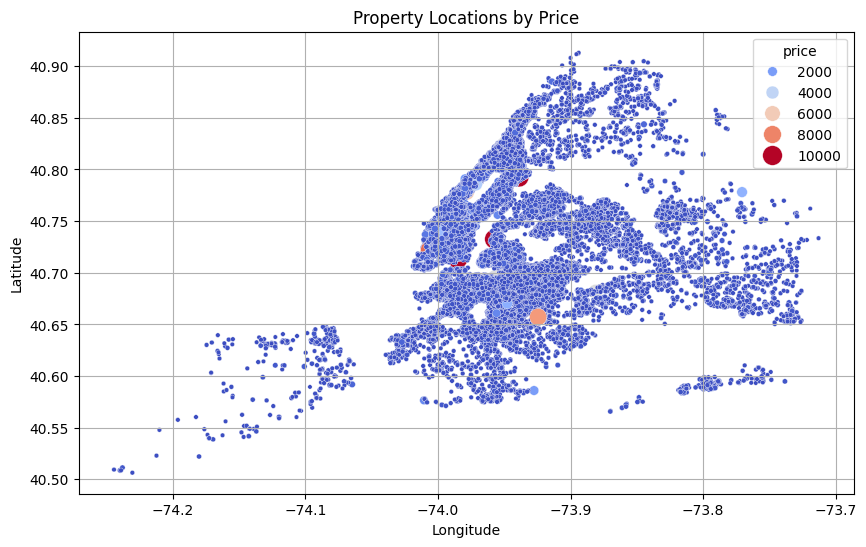

In [340]:
# Chart - 6 visualization code
# Property location by price, it tells which area has the less price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette='coolwarm', size='price', sizes=(10, 200))
plt.title('Property Locations by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot with geographic coordinates (longitude vs latitude) is ideal for visualizing property locations on a map-like layout.
Using color (hue) and size (size) to represent price adds a third and fourth dimension, making it easy to see which areas have higher or lower prices

##### 2. What is/are the insight(s) found from the chart?

1. Clustering patterns show where listings are concentrated geographically.
2. Color gradients reveal pricing differences.
3. Size of the dots also reinforces which listings are priced higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
1. Airbnb and hosts can adjust pricing based on area-specific demand and competition.
2. It improves the guest experience.

Negative impact:
1. Overpricing in cluster areas may not be budget-friendly for everyone which might affect the growth of the business.

#### Chart - 7

/tmp/ipython-input-341-1533792161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette='bright')


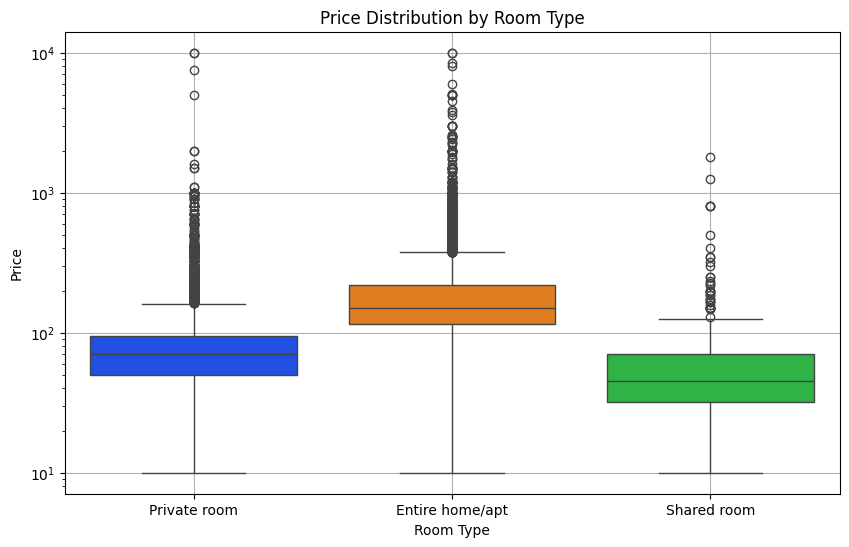

In [341]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price', palette='bright')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.yscale('log')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

1. A boxplot is ideal for visualizing the distribution and spread of a numerical variable (price) across different categories (room_type).

2. It shows key statistics: median, quartiles, and outliers together.

3. Applying a log scale to the y-axis helps handle extreme price values, which are common in Airbnb data, making the chart more readable and insightful.

##### 2. What is/are the insight(s) found from the chart?

1. Entire home/apt has the highest median price and the widest spread, indicating it includes both budget and luxury options.
2. Shared rooms and private rooms have lower prices and tighter distributions, suggesting more consistent pricing.
3. There are many outliers, especially for entire homes, showing very high-priced listings in that category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
1. Hosts can see how their room type compares to others and price competitively.
2. Airbnb can guide hosts on expected price ranges, reducing pricing errors and improving booking rates.
3. Helps Airbnb set better price filters and recommendation algorithms to match guest budgets.

Negative Impact:
1. Price variation within a category may confuse guests.
2. If outliers are overpriced or not delivering quality, it can lead to negative reviews and harm Airbnb’s reputation.
3. Market saturation of low-cost shared or private rooms might reduce profitability for hosts.

#### Chart - 8

/tmp/ipython-input-342-1921475613.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_review = df.groupby('availability_bin')['review_rate'].mean().reset_index()


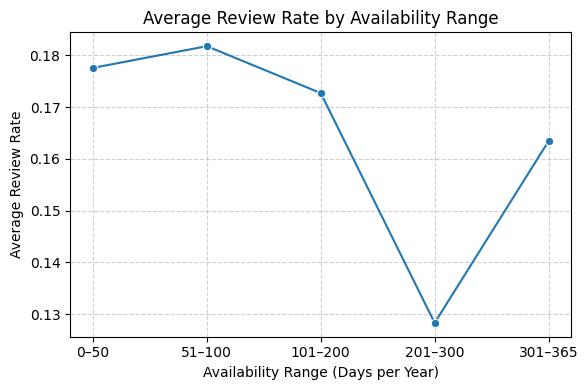

In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is already named df and contains 'availability_365' and 'review_rate'

# Bin availability_365 into ranges
df['availability_bin'] = pd.cut(
    df['availability_365'],
    bins=[0, 50, 100, 200, 300, 365],
    labels=['0–50', '51–100', '101–200', '201–300', '301–365']
)

# Group by bin and calculate mean review rate
avg_review = df.groupby('availability_bin')['review_rate'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(data=avg_review, x='availability_bin', y='review_rate', marker='o')
plt.title('Average Review Rate by Availability Range')
plt.xlabel('Availability Range (Days per Year)')
plt.ylabel('Average Review Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The line plot is selected because it helps in distinguishing average review rate in particular range.

##### 2. What is/are the insight(s) found from the chart?

We found that average review rate is higher for the accomodation having the availability range bewtween 51-100 and lowest for 201-300 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
High review rate led to increase in growth of business and more revenue.

Negative Impact:
Lower availability might lead to less profit for the accomodation having higher review but less availability.

#### Chart - 9

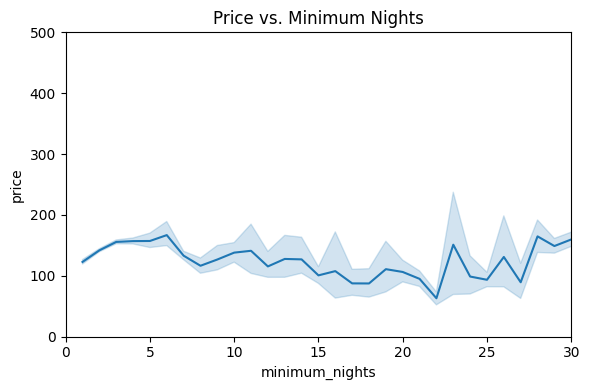

In [343]:
# Graph visualisation - 9
plt.figure(figsize=(6, 4))
sns.lineplot(x='minimum_nights', y='price', data=df)
plt.xlim(0, 30)
plt.ylim(0, 500)
plt.title('Price vs. Minimum Nights')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 To show how price changes with minimum nights, revealing the pricing trend for different stay lengths.

##### 2. What is/are the insight(s) found from the chart?

For very short stays, the price may be relatively low or stable and for longer minimum night requirements, the price can increase. The price range from 100-200. Also there is price variation between 20-25 minimum nights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
1. Optimize Pricing: Set more nuanced prices as average price doesn't strongly depend on minimum nights.
2. Guide Hosts: Advise hosts on optimal minimum night settings and pricing strategies based on market variability.
3. Improve Inventory: Identify specific stay durations for targeted promotions or analysis based on price consistency

Negative Impact:
1. For minimum night between 10-120 there is a decline in price which may affect revenue.

#### Chart - 10

/tmp/ipython-input-344-467382759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_availability, x='room_type', y='availability_365', palette='Set2')


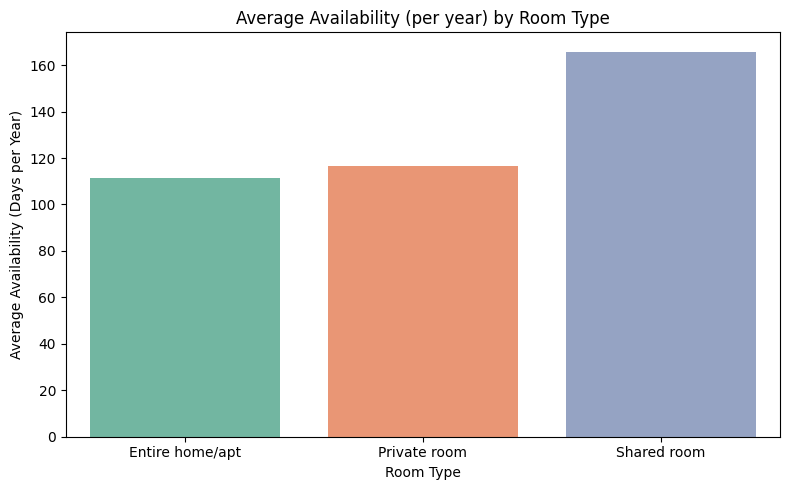

In [344]:
# Chart visualisation - 10
# Group by room type and calculate mean availability
avg_availability = df.groupby('room_type')['availability_365'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_availability, x='room_type', y='availability_365', palette='Set2')
plt.title('Average Availability (per year) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Availability (Days per Year)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It clearly compares how available each room type is on average across the year.



##### 2. What is/are the insight(s) found from the chart?

Entire home/apt listings have the highest average availability.

Private rooms have moderate availability.

Shared rooms tend to have the lowest availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Helps platforms recommend optimal room types to new hosts based on year-round demand.

Encourages hosts to improve availability settings to match market norms.

Useful for seasonal planning and pricing strategies.

Potential Negative:

Low availability of shared rooms could reflect limited demand or supply—may discourage budget travelers.

Over-saturation of high-availability entire homes could increase competition among hosts, lowering individual revenue.

#### Chart - 11

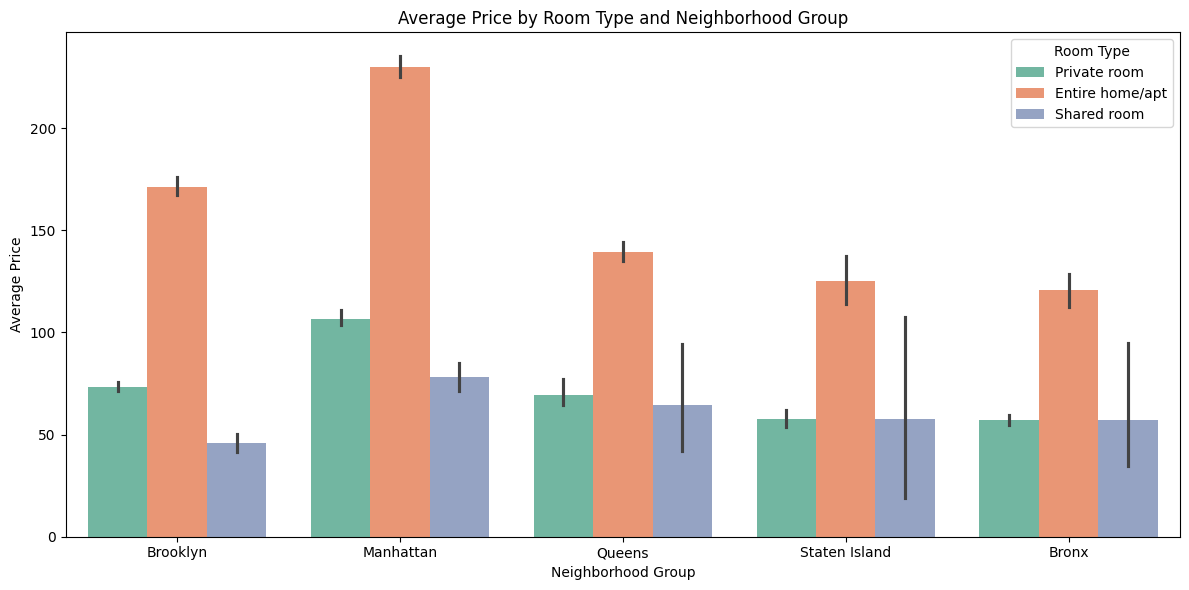

In [345]:
# Chart - 11 visualization code
# Graph visualization
plt.figure(figsize=(12, 6))

sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type',palette='Set2')
plt.title('Average Price by Room Type and Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart is great for comparing multiple categories. Also this graph tells us about how average price affects the room type in the different neighbourhood groups in the city.

##### 2. What is/are the insight(s) found from the chart?

1. It tells which neighbourhood group has the highest pricing.
2. It also tells how room type affect the pricing across each neighbourhood.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
1. It help the host to set a price by room type and location which help them to grow.
2. Airbnb can be able to provide the facilities at affordable price.

Negative Impact:
1. Guest may avoid booking at overpriced region and overpriced room type.

#### Chart - 12

/tmp/ipython-input-346-2453850128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_groups.values, y=top_groups.index, palette='magma')


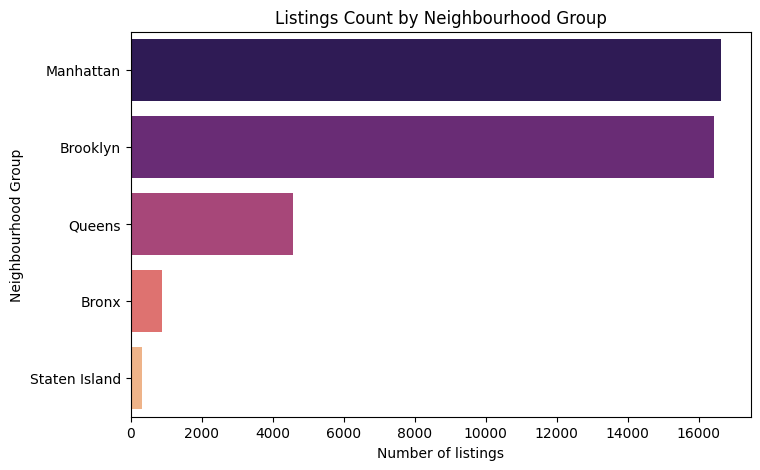

In [346]:
# Chart - 12 visualization code
top_groups = df['neighbourhood_group'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=top_groups.values, y=top_groups.index, palette='magma')
plt.title('Listings Count by Neighbourhood Group')
plt.ylabel('Neighbourhood Group')
plt.xlabel('Number of listings')
plt.show()

##### 1. Why did you pick the specific chart?

1. This type of bar graph has been able to provide clear information with the help of bars with acurate values and is suitable for the plotting between two variables and represent relationship between number of listings and neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

1. We are able to identify the relationship between number of listing and neighbourhood group which tells us that which neighbouhood group has the most number of listings.
2. This listing count help the user to choose the best suitable accomodation for ourselves.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:
1. This will create the growth in the business in the neighbourhood group having high listing counts.
2. Helps in improving the user experience by helping them to identify the best accomodation for themselves at a particular area.

Negative Impact:
1. There maybe chances of business getting affected at the places having less number of listings.

#### Chart - 13

<Axes: xlabel='longitude', ylabel='latitude'>

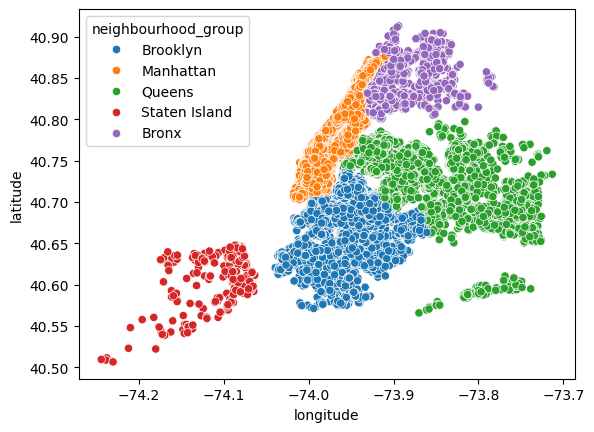

In [347]:
# Chart - 13 visualization code
sns.scatterplot(data=df, x="longitude", y="latitude", hue="neighbourhood_group")

##### 1. Why did you pick the specific chart?

To visually map listings by location, showing how each neighbourhood group is distributed geographically using longitude and latitude.

##### 2. What is/are the insight(s) found from the chart?

Different neighbourhood groups cluster in distinct geographic areas.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Helps platforms and hosts identify high-demand zones for targeted expansion.

Useful in location-based pricing, host onboarding, and urban planning for better coverage.

Negative Impact:

Oversaturation in one neighbourhood group could cause price undercutting and lower host earnings.


#### Chart - 14 - Correlation Heatmap

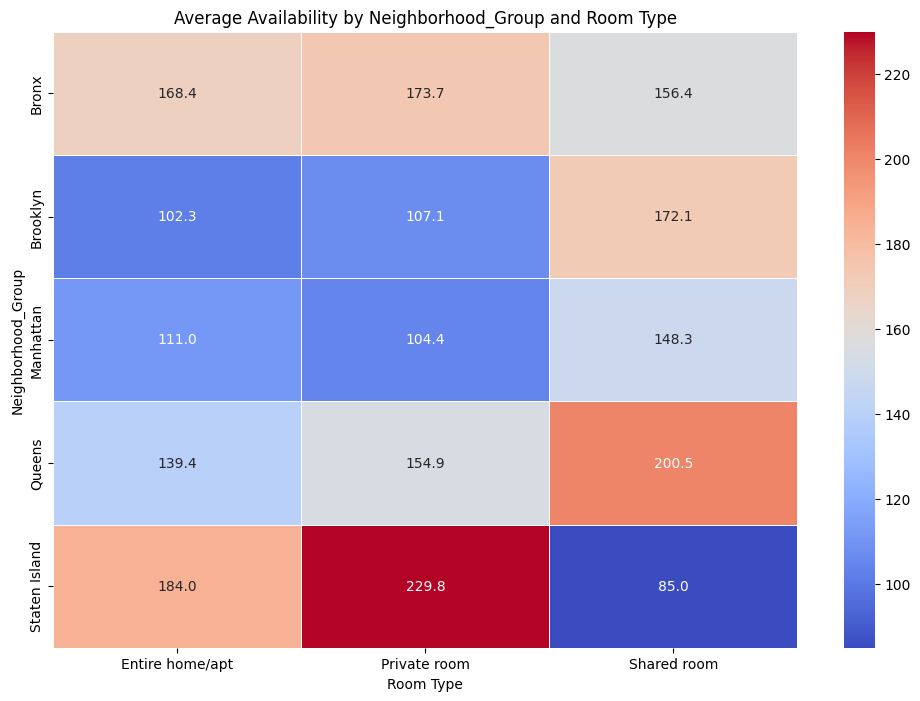

<Figure size 640x480 with 0 Axes>

In [348]:
# Graph visualisation - 14
# Correlation Heatmap visualization code

pivot = df.pivot_table(index='neighbourhood_group', columns='room_type', values='availability_365', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Availability by Neighborhood_Group and Room Type")
plt.xlabel("Room Type")
plt.ylabel("Neighborhood_Group")
plt.show()
plt.tight_layout()


##### 1. Why did you pick the specific chart?

A heatmap is ideal for showing the intensity or magnitude of values across two categorical variabls. Using color gradients makes it visually easy to spot high or low availability patterns.

##### 2. What is/are the insight(s) found from the chart?

1. Which neighborhood groups have higher average availability.
2. Which room types are more frequently available in specific areas.

#### Chart - 15 - Pair Plot

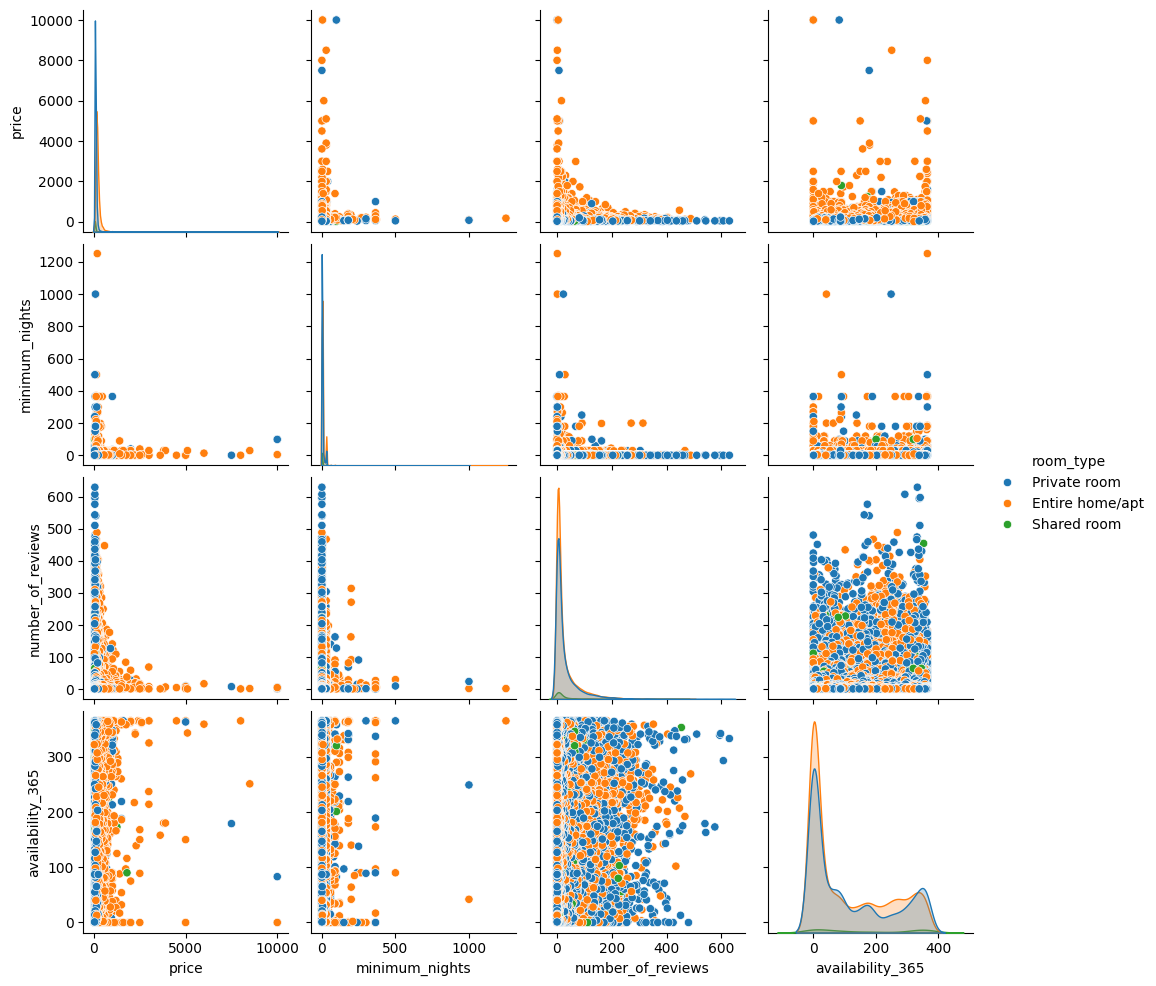

In [349]:
# Graph visualisation - 15
# Pair Plot visualization code

# Pairplot of numeric columns colored by 'room_type'
sns.pairplot(data = df, vars=['price', 'minimum_nights','number_of_reviews','availability_365'], hue='room_type')
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is ideal for visualizing the relationships between multiple numeric variables at once.

##### 2. What is/are the insight(s) found from the chart?

1. Price vs. minimum_nights: May show that listings with extremely high minimum nights don’t necessarily charge more — possibly long-term stays with discounts.
2. Price vs. number_of_reviews: Often shows an inverse relationship — very high-priced listings may get fewer reviews.
3. Availability vs. other variables: Listings with high availability might have more reviews if they’re actively booked; or fewer, if underutilized.
4. Room type patterns: Entire homes may cluster in a different range of prices and availability compared to private or shared rooms.

## **5. Solution to Business Objective**

**Based on the EDA, here are the key suggestions for the client to achieve their business objectives:**

For Hosts: Optimize pricing based on location and room type, prioritize gaining positive and recent reviews to boost visibility, and strategically manage availability to maximize bookings, especially in less saturated areas.

For Guests: Utilize insights on borough-specific pricing and room type costs to find accommodations within budget. Leverage review counts and recency to identify popular and reliable listings.

For Airbnb: Implement targeted marketing campaigns for specific market segments (e.g., luxury, budget), focus host recruitment efforts on underserved boroughs, and provide tools for hosts to enhance pricing and listing management.

Answer Here.

# **Conclusion**

This comprehensive EDA of the Airbnb NYC 2019 dataset provides valuable insights into listing behavior, guest preferences, and market dynamics across New York City, drawing from meticulous data wrangling and diverse visualizations.

Key conclusions include:

Listing Concentration: Brooklyn and Manhattan exhibit the highest density of listings, highlighting opportunities for resource allocation but also intense price competition within these dominant boroughs.

Price vs. Reviews: Listings with lower prices and shorter minimum night stays consistently garner more reviews, indicating higher guest engagement and value perception. Conversely, high-priced listings (especially above $600 after capping) are fewer, suggesting a potential, though niche, market for high-end stays.

Room Type Preferences: 'Private room' and 'Entire home/apt' are the most prevalent, with 'Private rooms' often preferred for their balance of affordability and privacy. 'Shared rooms' are significantly underutilized despite their high availability, pointing to a need for repositioning or added value.

Geographic Price Trends: The analysis confirms Manhattan commands the highest average prices across all room types, while specific premium neighborhoods within it (e.g., Tribeca) are the most expensive.

Minimum Night Impact: Higher minimum night requirements correlate with fewer reviews, suggesting they can limit booking frequency, particularly outside peak seasons.

Overall, the project underscores the critical need for dynamic pricing strategies, room-type specific optimization, highly localized market approaches, and continuous data-driven listing improvements. These strategies are essential for both the Airbnb platform and its hosts to enhance guest experience, increase occupancy, and drive sustainable business growth in NYC's competitive market.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***